# Задание 1

Реализуйте базовый частотный метод по Шерлоку Холмсу:
подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
расшифруйте их таким частотным методом.


### Комментарий к решению

#### Шаг 1
Возьмем в качестве обучающего текста "Войну и мир" на английском языке. Создадим словарь частот униграмм. Отсортируем по убыванию частоты

In [11]:
import re
from collections import Counter, defaultdict
from random import shuffle, sample, uniform
import random
from math import log, exp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
text_file = "WarAndPeaceEng.txt"

In [13]:
def calculate_frequencies(text_path, sub_tab=True):
    frequencies = Counter()
    with open(text_path, encoding='utf-8') as fp:
        for line in fp:
            if sub_tab:
                line = re.sub(r"\W+", " ", line).lower()
            frequencies.update(Counter(line))
    return frequencies

In [14]:
def sort_frequencies(frequencies):
    return [k for k, _ in sorted(frequencies.items(), key=lambda item: item[1], reverse=True)]

In [15]:
def look_at_dict(d, n=10):
    head = list(d.keys())[:n]
    for key in head:
        print({key: d[key]})

In [16]:
unigram_frequencies = calculate_frequencies(text_file)

In [17]:
look_at_dict(unigram_frequencies)

{' ': 596017}
{'t': 226406}
{'h': 167404}
{'e': 315233}
{'p': 45533}
{'r': 148428}
{'o': 192879}
{'j': 2574}
{'c': 61623}
{'g': 51326}


In [18]:
most_frequent = sort_frequencies(unigram_frequencies)
most_frequent[:10]

[' ', 'e', 't', 'a', 'o', 'n', 'i', 'h', 's', 'r']

#### Шаг 2
Создадим шифр из случайной перестановки униграмм. Для тестового примера возьмем 3 текста размером от 50 до 1000 символов.

In [19]:
random.seed(45)

def create_cipher(frequencies):
    encrypt = dict()
    decrypt = dict()
    keys = list(frequencies.keys())
    ciphered_keys = keys.copy()
    shuffle(ciphered_keys)
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[key] = ciphered_key
        decrypt[ciphered_key] = key
        assert key != ciphered_key
    return encrypt, decrypt

In [20]:
encrypt_dict, decrypt_dict = create_cipher(unigram_frequencies)

In [21]:
look_at_dict(encrypt_dict)

{' ': 'ä'}
{'t': 'é'}
{'h': 'f'}
{'e': 'w'}
{'p': 'j'}
{'r': 'b'}
{'o': 'y'}
{'j': 'ê'}
{'c': 'n'}
{'g': 'u'}


In [22]:
small_sample_text = "SmallSampleText.txt"
medium_sample_text = "MediumSampleText.txt"
big_sample_text = "BigSampleText.txt"

#### Шаг 3
Попробуем зашифровать и расшифровать тестовые примеры. Для расшифровки будем заменять наиболее часо встречающиеся униграммы в тестовом примере на наиболее частотые из словаря, созданного по "Войне и миру"

In [23]:
def encrypt_text(text, cipher):
    return ''.join([cipher[l] for l in text])

In [24]:
def preprocess_text(file, cipher, sub_tab=True):
    with open(file, encoding='utf-8') as fp:
        original_text = ''
        ciphered_text = ''
        for line in fp:
            if sub_tab:
                line = re.sub(r"\W+", " ", line).lower()
            original_text += line
            line = encrypt_text(line, cipher)
            ciphered_text += line
    return original_text, ciphered_text

In [25]:
def create_decryption_dict(text_most_frequent, train_text_most_frequent):
    decryption_dict = {}
    for i in range(len(text_most_frequent)):
        decryption_dict[text_most_frequent[i]] = train_text_most_frequent[i]
    return decryption_dict

In [26]:
def calculate_quality(origin_dictionary, decrypted_dictionary):
    return sum([1 if origin_dictionary[s] == decrypted_dictionary[s] else 0 for s in decrypted_dictionary]) / len(decrypted_dictionary)

In [29]:
def decrypt_text(
    text_file, encrypt_dict=encrypt_dict, decrypt_dict=decrypt_dict, 
    train_text_most_frequent=most_frequent, n_first_symbols_to_print = 256,
):
    original_text, encrypted_text = preprocess_text(text_file, encrypt_dict)
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
    
    encrypted_text_frequencies = Counter(encrypted_text)
    most_frequent = sort_frequencies(encrypted_text_frequencies)
    print(f'size_of_dictionary_encrypted_text: {len(most_frequent)}')
    print(f'size_of_dictionary_training_text: {len(encrypt_dict)}\n')
    
    frequencies_dict = create_decryption_dict(most_frequent, train_text_most_frequent)    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality(decrypt_dict, frequencies_dict):.2f}')

#### Шаг 4
Посмотрим на результаты. В качестве метрики возьмем процент правильно угаданных букв в тестовом примере. Метрика спорная, т.к. одни и те же буквы в ней будут посчитаны много раз, в зависимости от частоты. С другой стороны, она поощряет угадывать самые важные буквы, т.е. те, которые встречаются чаще других (в отличие, например, от процента правильно угаданных букв в словаре)

In [30]:
decrypt_text(small_sample_text)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

original_text: no one is right and no one is to blame so she too is not to blame

size_of_dictionary_encrypted_text: 15
size_of_dictionary_training_text: 41

decrypted_message: te eta io uimsn htc te eta io ne rdhla oe osa nee io ten ne rdhla

accuracy of decrypted dictionary is: 0.13


In [31]:
decrypt_text(medium_sample_text)

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

size_of_dictionary_encrypted_text: 26
size_of_dictionary_training_text: 41

decrypted_message: ekedgnhiom etteonial has aldeasg ceeo sroe ween haost oevyt aos eadt uathes pedwfbes aos prusedes at cewint a call nhe rpeourdy tily tnrvyiomt aos uhine tanio thret uinh diccrot uede aldeasg ro nhe haidsdettiom uat albrtn sroe troga uat wioithiom sdettiom 

accuracy of decrypted dictionary is: 0.27


In [32]:
decrypt_text(big_sample_text)

encrypted_text: kqéfäwonfämbwhfäàxykäxwhhäo1zäxwhhänfo1nwäymäxqmwäbw7oq1wzämybäéfyhwä1yéäcwéä9qxxwzäéfwäbwuq7w1éähéyyzäq1änyx471häymäàoééoxqy1äéfbwwäf41zbwzäjonwhäojobéäà4éä1wswbéfwxwhhäéfwä7w1äkwbwäoxkochäq1äy1wäo1zäéfwäho7wä7yyzäoxxäoxq9wäkwbwäéonqé4b1äo1zä7ybyhwäéox9äk

original_text: with each fresh blow less and less chance of life remained for those not yet killed the regiment stood in columns of battalion three hundred paces apart but nevertheless the men were always in one and the same mood all alike were taciturn and morose talk w

size_of_dictionary_encrypted_text: 25
size_of_dictionary_training_text: 41

decrypted_message: frts eams uiehs pdof dehh anl dehh msanme ou drue iecarnel uoi tsohe not yet vrddel tse iegrcent htool rn modwcnh ou pattadron tsiee swnliel bameh abait pwt nekeitsedehh tse cen feie adfayh rn one anl tse hace cool add adrve feie tamrtwin anl coiohe tadv f

accuracy of decrypted dictionary is: 0.32


#### Выводы
Тут и без метрик понятно, что ничего не понятно. Пока даже близко не получилось расшифровать что-то похожее на исходный текст

# Задание 2

Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
проведите тестирование аналогично п.1, но при помощи биграмм.


### Комментарий к решению

#### Шаг 1
По аналогии с п. 1 создадим словарь частот биграмм. Отсортируем по убыванию частоты

In [33]:
def calculate_ngram_frequencies(text_path, n_grams=2):
    frequencies = defaultdict(int)
    with open(text_path, encoding='utf-8') as fp:
        for line in fp:
            line = re.sub(r"\W+", " ", line).lower()
            for i in range(len(line) - n_grams + 1):
                frequencies[line[i: i + n_grams]] += 1
    return frequencies

In [34]:
bigram_frequencies = calculate_ngram_frequencies(text_file)

In [35]:
look_at_dict(bigram_frequencies)

{' t': 82891}
{'th': 73755}
{'he': 75247}
{'e ': 112667}
{' p': 16561}
{'pr': 7855}
{'ro': 14770}
{'oj': 121}
{'je': 564}
{'ec': 5434}


In [36]:
len(bigram_frequencies)

674

In [37]:
most_frequent_bigrams = sort_frequencies(bigram_frequencies)
most_frequent_bigrams[:10]

['e ', ' t', 'd ', 'he', 'th', ' a', 's ', 't ', 'in', ' h']

#### Шаг 2
Расшифровку будем проводить аналогично п. 1. Разница здесь в том, что некорректно заменять все подряд биграммы в зашифрованном тексте на биграммы из словаря, т.к. одни и те же зашифрованные униграммы будут расшифровываться по разному. Но для того, чтобы примерно прикинуть качество такого подхода, можно на этот момент закрыть глаза. Здесь также подойдет метрика, выбранная в п. 1, т.к. она как раз учитывает, что в разных местах мы можем по-разному расшифровать одну и ту же униграмму.

In [38]:
def encrypt_text_bigrams(text, cipher):
    encrypted_symbols = []
    
    for i in range(0, len(text) - 1, 2):
        if i == len(text) - 1:
            break
        encrypted_symbols.append(cipher[text[i: i + 2]])
    return ''.join(encrypted_symbols)

In [39]:
def calculate_ngrams_in_text(text, n_grams=2):
    frequencies = defaultdict(int)
    for i in range(len(text) - n_grams + 1):
        frequencies[text[i: i + n_grams]] += 1
    return frequencies

In [40]:
def calculate_quality_ngrams(original_text, decrypted_text):
    num_correct_symbols = sum([1 if original_text[i] == decrypted_text[i] else 0 for i in range(len(decrypted_text))])
    return num_correct_symbols / len(decrypted_text)

In [43]:
def decrypt_text_bigrams(
    text_file, encrypt_dict=encrypt_dict, decrypt_dict=decrypt_dict, 
    train_text_most_frequent=most_frequent_bigrams,
    n_first_symbols_to_print = 256,
):
    encrypted_text, original_text = preprocess_text(text_file, encrypt_dict)
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
    
    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text)
    most_frequent = sort_frequencies(encrypted_text_frequencies)
    print(f'size_of_dictionary_encrypted_text: {len(most_frequent)}')
    print(f'size_of_dictionary_training_text: {len(train_text_most_frequent)}\n')
    
    frequencies_dict = create_decryption_dict(most_frequent, train_text_most_frequent)
    decrypted_message = encrypt_text_bigrams(encrypted_text, frequencies_dict)
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality_ngrams(original_text, decrypted_message):.2f}')

In [44]:
decrypt_text_bigrams(small_sample_text)

encrypted_text: no one is right and no one is to blame so she too is not to blame

original_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

size_of_dictionary_encrypted_text: 33
size_of_dictionary_training_text: 674

decrypted_message: d inanhe a iatero hid inanhe at  srer  oe to tt e thn g s e  wnd

accuracy of decrypted dictionary is: 0.03


In [45]:
decrypt_text_bigrams(medium_sample_text)

encrypted_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

original_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 674

decrypted_message: sa wlo m hco i ff ngndtod noouh onm r wamelem  sha o tmene to heoubeinans headdiweisd  oteomron heanonuthi tatem pers itadldsh eascat elnee  yd  oin mlyt ale t tiy inhi nimlied tman d noouh itr th ahayo dy as hinand i ge swamet ed ginanlee fr m h bn  ie re

accuracy of decrypted dictionary is: 0.01


In [46]:
decrypt_text_bigrams(big_sample_text)

encrypted_text: with each fresh blow less and less chance of life remained for those not yet killed the regiment stood in columns of battalion three hundred paces apart but nevertheless the men were always in one and the same mood all alike were taciturn and morose talk w

original_text: kqéfäwonfämbwhfäàxykäxwhhäo1zäxwhhänfo1nwäymäxqmwäbw7oq1wzämybäéfyhwä1yéäcwéä9qxxwzäéfwäbwuq7w1éähéyyzäq1änyx471häymäàoééoxqy1äéfbwwäf41zbwzäjonwhäojobéäà4éä1wswbéfwxwhhäéfwä7w1äkwbwäoxkochäq1äy1wäo1zäéfwäho7wä7yyzäoxxäoxq9wäkwbwäéonqé4b1äo1zä7ybyhwäéox9äk

size_of_dictionary_encrypted_text: 279
size_of_dictionary_training_text: 674

decrypted_message: ov autroalliisalmydi fiss erhengief wesae on faye  scar  wg ted llitdol  u rmicenghe ae  smoo  creetrredt ilquois onatseso nend pousoutapa w mroisthcounat ldouln  am iss  ae o t wa sthscnis r  hvethy d  trense whrrthtoth niondn e soptfiivthy leteloe soegnd

accuracy of decrypted dictionary is: 0.01


#### Шаг 3
Для примера посмотрим еще на отрывок из "Анны Карениной"

In [47]:
huge_sample_text = "AnnaKareninaEng.txt"

In [48]:
decrypt_text_bigrams(huge_sample_text)

encrypted_text: leo tolstoy   anna karenina   translated by constance garnett    part one   vengeance is mine i will repay      i  happy families are all alike every unhappy family is unhappy in its own way  everything was in confusion in the oblonskys house the wife had 

original_text: xwyäéyxhéycäääo11oä9obw1q1oäääébo1hxoéwzäàcäny1héo1nwäuob1wééääääjobéäy1wäääsw1uwo1nwäqhä7q1wäqäkqxxäbwjocääääääqääfojjcämo7qxqwhäobwäoxxäoxq9wäwswbcä41fojjcämo7qxcäqhä41fojjcäq1äqéhäyk1äkocääwswbcéfq1uäkohäq1äny1m4hqy1äq1äéfwäyàxy1h9chäfy4hwäéfwäkqmwäfozä

size_of_dictionary_encrypted_text: 586
size_of_dictionary_training_text: 674

decrypted_message: esatg ccg nditerttk neis hh itrrerrco outondbeoouryoe efegies itvenes ene it dhaceyoe  ff  he soimeautokfritititsot odohteaveefiinnee a hoa uee un wndmoedakndiveclyreinmoedaknd hreugy pt sfritun wduonha sasren beehw fon  h td y eyen klut hint td  stse edhe

accuracy of decrypted dictionary is: 0.01


#### Выводы
На больших текстах кол-во биграмм в тестовом отрывке становится сопоставимо с общих количеством биграмм в словаре. Но качество по-прежнему далеко от приемлемого уровня. И даже ниже, чем на униграммах.

# Задание 3

Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
реализуйте и протестируйте его, убедитесь, что результаты улучшились.

### Комментарий к решению

#### Шаг 1
Используем алгоритм Метрополиса-Гастингса. 
1) Берем базовый шифр, который получается из случайной перестановки символов в словаре. Расшифровывем текст (по униграммам, с помощью полученного шифра).  
2) Составляем словарь частот биграмм (в последствии n-грамм) в расшифрованном тексте.  
3) Берем словарь частот биграмм (в последствии n-грамм) в обучающем тексте ("Война и мир").  
4) Считаем "скор" нашего шифра по формуле:  
$score = \Sigma v * log(u)$, где  
v - частота биграммы в расшифрованном тексте  
u - частота биграммы в тренировочном тексте  
Сумма считается по всем биграммам из расшифрованного тектса  
5) Далее делаем n итераций (в базовом сценарии 10000). На каждой итерации случайно переставляем 2 символа в словаре. Счиатем "скор" нового шифра. Если он больше базового, берем этот словарь в качесте базового. Если нет, берем его с вероятностью exp(score_new-score_basic)  
6) Проверяем, что на какой-то итерации система достигает "динамического равновесия" и большинство букв в словаре не меняются и похожи на правду.

In [49]:
def generate_cipher(frequencies):
    encrypt = dict()
    keys = list(frequencies.keys())
    ciphered_keys = keys.copy()
    shuffle(ciphered_keys)
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[key] = ciphered_key
    return encrypt

def random_permute_cipher(frequencies):
    cipher = frequencies.copy()
    key_1, key_2 = sample(cipher.keys(), 2)
    cipher[key_1], cipher[key_2] = cipher[key_2], cipher[key_1]
    return cipher

In [50]:
def get_cipher_score(bigram_frequencies, decrypted_text_frequencies):
    cipher_score = 0
    for k, v in decrypted_text_frequencies.items():
        if k in bigram_frequencies:
            cipher_score += v * log(bigram_frequencies[k])
    return cipher_score

In [51]:
def metropolis_hastings_log_accept(l, l_new):
    if l_new > l:
        return True
    else:
        return uniform(0, 1) < exp(l_new-l)

In [52]:
def metropolis_hastings_decrypt(
    n_iter, encrypted_text, unigram_frequencies, bigram_frequencies, n_first_symbols_to_print, n_grams=2, verbose=True,
):
    current_cipher = generate_cipher(unigram_frequencies)
    decrypted_text = ''.join([current_cipher[s] for s in encrypted_text])
    decrypted_text_frequencies = calculate_ngrams_in_text(decrypted_text, n_grams)
    current_score = get_cipher_score(bigram_frequencies, decrypted_text_frequencies)
    
    for i in range(n_iter):
        proposed_cipher = random_permute_cipher(current_cipher)
        proposed_decrypted_text = ''.join([proposed_cipher[s] for s in encrypted_text])
        proposed_decrypted_text_frequencies = calculate_ngrams_in_text(proposed_decrypted_text, n_grams)
        proposed_current_score = get_cipher_score(bigram_frequencies, proposed_decrypted_text_frequencies)
        
        if metropolis_hastings_log_accept(current_score, proposed_current_score):
            current_cipher = proposed_cipher
            current_score = proposed_current_score
        
        if verbose and i % 500 == 0:
            print(f"iteration {i}: {''.join([current_cipher[s] for s in encrypted_text])[:n_first_symbols_to_print]}")
    
    return current_cipher

In [53]:
def decrypt_text_n_grams_mcmc(
    text_file, 
    encrypt_dict=encrypt_dict,
    train_ngram_frequencies=bigram_frequencies,
    alphabet=unigram_frequencies,
    n_first_symbols_to_analyze = None,
    n_first_symbols_to_print = 256,
    n_iter = 10000,
    n_grams = 2,
    verbose = True,
):
    original_text, encrypted_text = preprocess_text(text_file, encrypt_dict)
    if n_first_symbols_to_analyze:
        original_text = original_text[:n_first_symbols_to_analyze] 
        encrypted_text = encrypted_text[:n_first_symbols_to_analyze]
    
    if verbose:
        print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')
        print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')

    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text, n_grams=n_grams)
    if verbose:
        print(f'size_of_dictionary_encrypted_text: {len(encrypted_text_frequencies)}')
        print(f'size_of_dictionary_training_text: {len(train_ngram_frequencies)}\n')

    frequencies_dict = metropolis_hastings_decrypt(
        n_iter, encrypted_text, alphabet, train_ngram_frequencies, n_first_symbols_to_print, n_grams, verbose,
    )
    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    accuracy = calculate_quality_ngrams(original_text, decrypted_message)
    if verbose:
        print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
        print(f'accuracy of decrypted dictionary is: {accuracy:.2f}')
    return frequencies_dict, accuracy

#### Шаг 2
Проверяем на текстах разной длины. 

In [60]:
_ = decrypt_text_n_grams_mcmc(small_sample_text)

original_text: no one is right and no one is to blame so she too is not to blame

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

size_of_dictionary_encrypted_text: 33
size_of_dictionary_training_text: 674

iteration 0:  jnj kndgntdy09nà 5n jnj kndgn9jn6uàvkngjng0kn9jjndgn j9n9jn6uàvk
iteration 500: at tad ro ergns kam at tad ro st uckid ot ond stt ro ats st uckid
iteration 1000: es sed ro prmut kel es sed ro ts icknd os oud tss ro est ts icknd
iteration 1500: es sed ro armut heg es sed ro ts nchid os oud tss ro est ts nchid
iteration 2000: es sed ro urmat hel es sed ro ts nchid os oad tss ro est ts nchid
iteration 2500: is sid ro urvnt him is sid ro ts ached os ond tss ro ist ts ached
iteration 3000: as sad or womnt hag as sad or ts iched rs rnd tss or ast ts iched
iteration 3500: it tid ar bakns him it tid ar st owhed rt rnd stt ar its st owhed
iteration 4000: it tid ar bauns hif it tid ar st owhed rt rnd stt ar its st owhed
iteration 4500: it tid a

In [62]:
_ = decrypt_text_n_grams_mcmc(medium_sample_text)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 674

iteration 0: êvêu7ä j1oxê55ê1äjcqx cgxcquêcg7xdêê1xg31êxàêêäx c1g5x1êse5xc1gxêcu5x4c5 êgxrêuàmnêgxc1gxr34gêuêgxc5xdêàjä5xcxdcqqxä êx3rê143uex5jqex5ä3sej1o5xc1gx4 jäêx5cäj1x5 3ê5x4jä xujdd315x4êuêxcquêcg7x31xä êx cjuguê55j1ox4c5xcqn35äxg31êx5317cx4c5xàj1j5 j1oxguê55j1ox
iteration 500: ozowgndatu ossotnaec dem ecwoemg poot mito foon detms toxhs etm oews lesdom kowfryom etm k

In [56]:
bigrams_decrypt_dict, _ = decrypt_text_n_grams_mcmc(big_sample_text)

original_text: with each fresh blow less and less chance of life remained for those not yet killed the regiment stood in columns of battalion three hundred paces apart but nevertheless the men were always in one and the same mood all alike were taciturn and morose talk w

encrypted_text: kqéfäwonfämbwhfäàxykäxwhhäo1zäxwhhänfo1nwäymäxqmwäbw7oq1wzämybäéfyhwä1yéäcwéä9qxxwzäéfwäbwuq7w1éähéyyzäq1änyx471häymäàoééoxqy1äéfbwwäf41zbwzäjonwhäojobéäà4éä1wswbéfwxwhhäéfwä7w1äkwbwäoxkochäq1äy1wäo1zäéfwäho7wä7yyzäoxxäoxq9wäkwbwäéonqé4b1äo1zä7ybyhwäéox9äk

size_of_dictionary_encrypted_text: 279
size_of_dictionary_training_text: 674

iteration 0: 1dozfwy0zfläwpzf4gn1fgwppfy8hfgwppf0zy80wfnlfgdlwfäw6yd8whflnäfoznpwf8nof7wof2dggwhfozwfäwêd6w8ofponnhfd8f0nge68pfnlf4yooygdn8fozäwwfze8häwhfay0wpfyayäof4eof8wtwäozwgwppfozwf6w8f1wäwfyg1y7pfd8fn8wfy8hfozwfpy6wf6nnhfyggfygd2wf1wäwfoy0doeä8fy8hf6nänpwfoyg2f1
iteration 500: gurh elih vneth csog sett ldm sett ihldie ov suve nepludem von rhote dor yer 3ussem rhe ne

#### Выводы
Алгоритм работает гораздо лучше предыдущих! И распознает даже относительно короткие тексты очень точно

#### Шаг 3
Попробуем расшифровать короткий текст словарем, обученном на длинном тексте. 

In [73]:
original_sample_text, encrypted_sample_text = preprocess_text(small_sample_text, encrypt_dict)

In [69]:
def decrypt_message_with_dict(encrypted_text, original_text, decrypt_dict, n_first_symbols_to_print=256):
    print(f'encrypted_text: {encrypted_text[:n_first_symbols_to_print]}\n')
    decrypted_message = ''.join([decrypt_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')
    print(f'accuracy of decrypted dictionary is: {calculate_quality_ngrams(original_text, decrypted_message):.2f}')

In [74]:
decrypt_message_with_dict(encrypted_sample_text, original_sample_text, bigrams_decrypt_dict)

encrypted_text: 1yäy1wäqhäbquféäo1zä1yäy1wäqhäéyäàxo7wähyähfwäéyyäqhä1yéäéyäàxo7w

decrypted_message: no one is right and no one is to blame so she too is not to blame

accuracy of decrypted dictionary is: 1.00


#### Работает!

# Задание 4

Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

#### Шаг 1
Действуем по аналогии с п. 3. Пробуем сначала английский язык.

In [75]:
secret_message = "SecretMessage.txt"

In [76]:
def generate_random_cipher(symbols, alphabet):
    encrypt = dict()
    ciphered_keys = list(symbols.keys())
    keys = sample(list(alphabet.keys()), len(ciphered_keys))
    for key, ciphered_key in zip(keys, ciphered_keys):
        encrypt[ciphered_key] = key
    return encrypt

In [89]:
def decrypt_ciphered_text_n_grams_mcmc(
    text_file, 
    train_text_file,    
    n_first_symbols_to_print = 256,
    n_iter = 10000,
    n_grams = 2,
):
    alphabet = calculate_frequencies(train_text_file)
    encrypted_alphabet = calculate_frequencies(text_file, sub_tab=False)
    
    train_ngram_frequencies = calculate_ngram_frequencies(train_text_file, n_grams=n_grams)
    init_random_cipher = generate_random_cipher(encrypted_alphabet, alphabet)
    
    original_text, encrypted_text = preprocess_text(text_file, init_random_cipher, sub_tab=False)
    print(f'original_text: {original_text[:n_first_symbols_to_print]}\n')   
    
    encrypted_text_frequencies = calculate_ngrams_in_text(encrypted_text, n_grams=n_grams)
    print(f'size_of_dictionary_encrypted_text: {len(encrypted_text_frequencies)}')
    print(f'size_of_dictionary_training_text: {len(train_ngram_frequencies)}\n')
    
    frequencies_dict = metropolis_hastings_decrypt(
        n_iter, encrypted_text, alphabet, train_ngram_frequencies, n_first_symbols_to_print, n_grams
    )
    
    decrypted_message = ''.join([frequencies_dict[s] for s in encrypted_text])
    print(f'decrypted_message: {decrypted_message[:n_first_symbols_to_print]}\n')

#### Шаг 2
Для начала переведем все символы в известные униграммы случаным образом (чтобы дальше уже работать в рамках одного набора символов)

In [78]:
encrypted_alphabet = calculate_frequencies(secret_message, sub_tab=False)
look_at_dict(encrypted_alphabet)

{'←': 22}
{'⇠': 10}
{'⇒': 13}
{'↟': 15}
{'↹': 34}
{'↷': 7}
{'⇊': 6}
{'↤': 4}
{'↨': 12}
{'↝': 13}


In [79]:
init_random_cipher = generate_random_cipher(encrypted_alphabet, unigram_frequencies)
look_at_dict(init_random_cipher)

{'←': 'c'}
{'⇠': 'z'}
{'⇒': 'ê'}
{'↟': 't'}
{'↹': 'k'}
{'↷': '8'}
{'⇊': '2'}
{'↤': 'v'}
{'↨': ' '}
{'↝': '7'}


In [92]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, text_file, n_iter = 50000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 127
size_of_dictionary_training_text: 674

iteration 0: 6vhpyixyip7pz6ys5nfkh0sxlyphpy158zpys5nfkh0sxlyz6uvzyàyêz5m5yv55jc6sp2yu5z5nxlyh6mu5y1n58pzkz0yvu5n66yiv6m5yixyiv6yv76hkhpy1nkiph0s5ypy15hà8pz6yfkuvpfkh0sxlyjkhhyqky15vh67s66y86zi6nz56yqk7ksp6yuànvkyw5z2yu5s68s5y2ysp86m5ys6y5j6ck 
iteration 500: sanoiclicouoesir twhngrlyionoid veoir twhngrlyiesmaeibije p ia  k9srofim e tlyinspm idt voehegiam tssicasp iclicasiausnhnoidthcongr ioid nbvoesiwhmaowhngrlyikhnnizhid ansurssivsecste sizhuhrosimbtahix efim rsvr ifirovsp irsi ks9h0
iteration 1000: stal cr clules ionwhadiry lal kovel ionwhadiry esmte b jeopo toozgsilf moeonry aspmo knovlehed tmonss ctspo cr cts tusahal knhcladio l koabvles whmtlwhadiry zhaa xh kota

iteration 18000: erca bl bapase tongichtly aca womsa tongichtly sefrs u 3sodo roovzetak fosonly cedfo wnomasish rfonee bredo bl bre rpecica wnibachto a wocumase gifragichtly vicc xi worceptee mesbensoe xipitae funri josk fotemto k tamedo te oveziq
iteration 18500: erca bl bamase tongichtly aca wopsa tongichtly sefrs u 5sodo roovxetak fosonly cedfo wnopasish rfonee bredo bl bre rmecica wnibachto a wocupase gifragichtly vicc zi worcemtee pesbensoe zimitae funri josk fotepto k tapedo te ovexiq
iteration 19000: erca bl bapase tongichtly aca womsa tongichtly sefrs u 8sodo roovxetak fosonly cedfo wnomasish rfonee bredo bl bre rpecica wnibachto a wocumase gifragichtly vicc zi worceptee mesbensoe zipitae funri josk fotemto k tamedo te ovexiq
iteration 19500: erca bl bapase tongichtly aca womsa tongichtly sefrs u 3sodo roovxetak fosonly cedfo wnomasish rfonee bredo bl bre rpecica wnibachto a wocumase gifragichtly vicc zi worceptee mesbensoe zipitae funri josk fotemto k tamedo te ovexiq
iteratio

iteration 39000: erca bl bamase tongichtly aca wopsa tongichtly sefrs u 1sodo roovzetak fosonly cedfo wnopasish rfonee bredo bl bre rmecica wnibachto a wocupase gifragichtly vicc xi worcemtee pesbensoe ximitae funri josk fotepto k tapedo te oveziq
iteration 39500: ersa bl bamace tongishtly asa wopca tongishtly cefrc u 1codo roovxetak foconly sedfo wnopacich rfonee bredo bl bre rmesisa wnibashto a wosupace gifragishtly viss zi worsemtee pecbencoe zimitae funri jock fotepto k tapedo te ovexiq
iteration 40000: erca bl bagase tondichtly aca wopsa tondichtly sefrs u 0somo roovxetak fosonly cemfo wnopasish rfonee bremo bl bre rgecica wnibachto a wocupase difradichtly vicc zi worcegtee pesbensoe zigitae funri josk fotepto k tapemo te ovexiq
iteration 40500: erca bl bagase tondichtly aca wopsa tondichtly sefrs u qsomo roovxetak fosonly cemfo wnopasish rfonee bremo bl bre rgecica wnibachto a wocupase difradichtly vicc zi worcegtee pesbensoe zigitae funri josk fotepto k tapemo te ovexiä
iteratio

#### Промежуточный итог
Видно, что алгоритм не очень работает, даже на 50000 итераций. Пробуем перейти на русский!

In [93]:
russian_text_file = "WarAndPeace.txt"

In [94]:
unigram_frequencies_russian = calculate_frequencies(russian_text_file)
look_at_dict(unigram_frequencies_russian)

{'a': 1887}
{'n': 2066}
{'o': 1724}
{'t': 1640}
{'i': 1988}
{' ': 116477}
{'в': 24824}
{'о': 61282}
{'й': 6210}
{'н': 35119}


In [95]:
bigram_frequencies_russian = calculate_ngram_frequencies(russian_text_file)
look_at_dict(bigram_frequencies_russian, 20)

{'an': 255}
{'nn': 162}
{'no': 112}
{'ot': 61}
{'ta': 59}
{'at': 61}
{'ti': 107}
{'io': 43}
{'on': 481}
{'n ': 553}
{' в': 9492}
{'во': 4474}
{'ой': 2296}
{'йн': 217}
{'на': 6546}
{'а ': 10656}
{' и': 6754}
{'и ': 11423}
{' м': 3646}
{'ми': 2209}


In [100]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 127
size_of_dictionary_training_text: 1387

iteration 0: гö016цj6ц121îг6iщт3e0íijy61016ьщwî16iщт3e0íijy6îгкöî6â6мîщuщ6öщщsfгi1р6кщîщтjy60гuкщ6ьтщw1îeîí6öкщтгг6цöгuщ6цj6цöг6ö2г0e016ьтeц10íiщ616ьщ0âw1îг63eкö13e0íijy6se006хe6ьщö0г2iгг6wгîцгтîщг6хe2ei1г6кâтöe6gщîр6кщiгwiщ6р6i1wгuщ6iг6щsгfeû
iteration 500: ua cniхnicяcуunteвшн étхgnc cndeoуcnteвшн étхgnуumaуnрnjуepenaeesyutchnmeуeвхgn upmendвeocунуénameвuuniaupeniхniaunaяu н cndвнic étencnde рocуunшнmacшн étхgnsн  nднndea uяtuunouуiuвуeunднянtcunmрвaнnbeуhnmetuotenhntcoupentunesuyнт
iteration 1000: ua onrаnrogocunteвин ptакno ondesconteвин ptакncuvacnгnçceienaeeудutohnveceвакn uivendвesocнcpnaveвuunrauienrаnraunagu н ondвнro ptenonde гsocunинvaoин ptакnун  nжнndea

iteration 16000: ясне вр ветеля дerгонадру ене deзле дerгонадру лямсл ш блene сeeпьядеи мeлerру няnмe dreзелола смerяя всяne вр вся стяноне drовенадe е deншзеля гомсегонадру понн ко deснятдяя зялвяrлeя котодея мшrсо meли мeдяздe и дезяne дя eпяьой
iteration 16500: ясна вр ваталя дerгонедру ана deзла дerгонедру лямсл ш блene сeeпьядаи мeлerру няnмe dreзалоле смerяя всяne вр вся стянона drованедe а deншзаля гомсагонедру понн ко deснятдяя зялвяrлeя котодая мшrсо leли мeдяздe и дазяne дя eпяьой
iteration 17000: есна вл ватаре дугuонядлe ана кубра дугuонядлe ремср ж зруmу суупхедаи муруглe неmму кгубароря смугее всеmу вл все стенона кгованяду а кунжбаре uомсаuонядлe понн фо куснетдее бервегруе фотодае мжгсо шури мудебду и дабеmу де упехой
iteration 17500: есна вл вабаре дотхунядлe ана когра дотхунядлe ремср й фрочо соопьедаи моротлe нечмо ктогаруря смотее всечо вл все сбенуна ктуванядо а конйгаре хумсахунядлe пунн зу коснебдее герветрое зубудае мйтсу шори модегдо и дагечо де опеьуí
iteratio

iteration 33500: если вы вимите норзальный или подти норзальный текст у этого соочшених который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботх конедно х нидего не очешая
iteration 34000: если вы вимите норзальный или подти норзальный текст у этого соочшених который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботх конедно х нидего не очешая
iteration 34500: если вы вимите норжальный или подти норжальный текст у этого соочшених который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса ботх конедно х нидего не очешая
iteration 35000: если вы вимите норжальный или подти норжальный текст у этого соочшених который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный чалл за послемнее детвертое замание курса ботх конедно х нидего не очешая
iteratio

iteration 51500: если вы вимите норзальный или подти норзальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботя конедно я нидего не очешаф
iteration 52000: если вы вимите норзальный или подти норзальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботя конедно я нидего не очешаф
iteration 52500: если вы вимите норзальный или подти норзальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботя конедно я нидего не очешаф
iteration 53000: если вы вимите норзальный или подти норзальный текст у этого соочшения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный чалл жа послемнее детвертое жамание курса ботя конедно я нидего не очешах
iteratio

iteration 70500: если вы вимите норжальный или подти норжальный текст у этого сообчения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обечаю
iteration 71000: если вы вимите норжальный или подти норжальный текст у этого сообчения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обечаю
iteration 71500: если вы вимите норжальный или подти норжальный текст у этого сообчения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обечаю
iteration 72000: если вы вимите норжальный или подти норжальный текст у этого сообчения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обечаю
iteratio

iteration 91000: если вы вимите норзальный или подти норзальный текст у этого соожчения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ба послемнее детвертое бамание курса хотя конедно я нидего не ожечаю
iteration 91500: если вы вимите норзальный или подти норзальный текст у этого соожчения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ба послемнее детвертое бамание курса хотя конедно я нидего не ожечаш
iteration 92000: если вы вимите норзальный или подти норзальный текст у этого соожчения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ба послемнее детвертое бамание курса хотя конедно я нидего не ожечаш
iteration 92500: если вы вимите норзальный или подти норзальный текст у этого соожчения который легко продитать скорее всего вы все смелали правильно и полудите заксизальный жалл ба послемнее детвертое бамание курса хотя конедно я нидего не ожечаc
iteratio

#### Выводы
После нескольких попыток текст удалось расшифровать! На это понадобилось 100 тысяч итераций и примерно 20 запусков.

#### Дополнение
Попробуем расшифровать на 3 и 4-граммах

In [105]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_grams=3, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 187
size_of_dictionary_training_text: 10408

iteration 0: 6ыдêàgüàgêвêt6àhqтмюдйhüяàêдêàvqъtêàhqтмюдйhüяàt6чыtàнà9tqпqàыqqwб6hê8àчqtqтüяàд6пчqàvтqъêtюtйàычqт66àgы6пqàgüàgы6àыв6дюдêàvтюgêдйhqàêàvqднъêt6àмючыêмюдйhüяàwюддàзюàvqыд6вh66àъ6tg6тtq6àзювюhê6àчнтыюàèqt8àчqh6ъhqà8àhêъ6пqàh6àqw6бюa
iteration 500:  ойзнуьнузiзш неатцбйяеьинзйзнхакшзнеатцбйяеьинш мошнoнчшаваноааюф ез1нмашатьинй вманхтакзшбшяномат  нуо вануьнуо ноi йбйзнхтбузйяеанзнхайoкзш нцбмозцбйяеьинюбййнпбнхаой iе  нк шу тша нпбiбез нмoтобнщаш1нмае кеан1незк ване наю фб6
iteration 1000:  орднухнудмдч неазыбриехяндрднщатчднеазыбриехянч лочнèн9чаваноаацж едгнлачазхянр вланщзатдчбчинолаз  нуо ванухнуо ном рбрднщзбудриеанднщарèтдч ныблодыбриехянцбррн8бнща

iteration 16000: ерни дь дичиле тобманутью ини посли тобманутью лекрл ы глово роошжетия колобью невко пбосилалу ркобее древо дь дре рченани пбадинуто и понысиле макриманутью шанн за порнечтее селдеблое зачатие кыбра холя котесто я тисево те ошежаi
iteration 16500: ерни дь дичиле тобманутью ини посли тобманутью лекрл ы глово роошжетия колобью невко пбосилалу ркобее древо дь дре рченани пбадинуто и понысиле макриманутью шанн за порнечтее селдеблое зачатие кыбра холя котесто я тисево те ошежаe
iteration 17000: ерни дь дичиле тобманутью ини посли тобманутью лекрл ы шлово роогжетия колобью невко пбосилалу ркобее древо дь дре рченани пбадинуто и понысиле макриманутью ганн за порнечтее селдеблое зачатие кыбра холя котесто я тисево те огежаr
iteration 17500: ерни дь дивиле тобманутью ини посли тобманутью лекрл ы шлого роочжетия колобью негко пбосилалу ркобее дрего дь дре рвенани пбадинуто и понысиле макриманутью чанн за порневтее селдеблое заватие кыбра холя котесто я тисего те очежаè
iteratio

iteration 34500: ерни вь видите лобманулью ини пости лобманулью текрт ы этого роочшелия котобью негко пбоситату ркобее врего вь вре рденани пбавинуло и понысите макриманулью чанн за порнедлее сетвебтое задалие кыбра хотя колесло я лисего ле очеша2
iteration 35000: ерни вь видите лобманулью ини пости лобманулью текрт ы этого роочшелия котобью негко пбоситату ркобее врего вь вре рденани пбавинуло и понысите макриманулью чанн за порнедлее сетвебтое задалие кыбра хотя колесло я лисего ле очешаz
iteration 35500: ерни вь видите лобманулью ини пости лобманулью текрт ы этого роочшелия котобью негко пбоситату ркобее врего вь вре рденани пбавинуло и понысите макриманулью чанн за порнедлее сетвебтое задалие кыбра хотя колесло я лисего ле очешаb
iteration 36000: ерни вь видите лобманулью ини пости лобманулью текрт ы этого роочшелия котобью негко пбоситату ркобее врего вь вре рденани пбавинуло и понысите макриманулью чанн за порнедлее сетвебтое задалие кыбра хотя колесло я лисего ле очешаî
iteratio

iteration 51500: если вы видите нормальныю или почти нормальныю текст у этого сообщения которыю легко прочитать скорее всего вы все сделали правильно и получите максимальныю балл за последнее четвертое задание курса хотя конечно я ничего не обещаí
iteration 52000: если вы видите нормальныю или почти нормальныю текст у этого сообщения которыю легко прочитать скорее всего вы все сделали правильно и получите максимальныю балл за последнее четвертое задание курса хотя конечно я ничего не обещаr
iteration 52500: если вы видите норюальным или почти норюальным текст у этого сообщения которым легко прочитать скорее всего вы все сделали правильно и получите юаксиюальным балл за последнее четвертое задание курса хотя конечно я ничего не обещаr
iteration 53000: если вы видите норюальным или почти норюальным текст у этого сообщения которым легко прочитать скорее всего вы все сделали правильно и получите юаксиюальным балл за последнее четвертое задание курса хотя конечно я ничего не обещаw
iteratio

iteration 69000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаъ
iteration 69500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаé
iteration 70000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаô
iteration 70500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаs
iteratio

iteration 86000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаё
iteration 86500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю
iteration 87000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаè
iteration 87500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаv
iteratio

In [106]:
decrypt_ciphered_text_n_grams_mcmc(secret_message, russian_text_file, n_grams=4, n_iter = 100000)

original_text: ←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏

size_of_dictionary_encrypted_text: 205
size_of_dictionary_training_text: 41262

iteration 0: rёgèmтаmтèaèюrmz0е3ügшzаjmègèmв0пюèmz0е3ügшzаjmюràёюm2mыю0ö0mё00 trzè8mà0ю0еаjmgröà0mве0пèюüюшmёà0еrrmтёrö0mтаmтёrmёargügèmвеüтègшz0mèmв0g2пèюrm3üàёè3ügшzаjm üggm7ümв0ёgrazrrmпrютrею0rm7üaüzèrmà2еёüme0ю8mà0zrпz0m8mzèпrö0mzrm0 rtüщ
iteration 500: йеяэ вk вэоэкй тишuыястk0 эяэ михкэ тишuыястk0 кйdек 8 fкили еииlçйтэа dикишk0 яйлdи мшихэкыкс еdишйй вейли вk вей еойяыяэ мшывэясти э мия8хэкй uыdеэuыястk0 lыяя бы миеяйотйй хйквйшкий быоытэй d8шеы рика dитйхти а тэхйли тй иlйçыg
iteration 1000: йеыо вр во3окй танåяыстру оыо забко танåяыстру кймек ф sкала еаа0шйтои маканру ыйлма знабокякс еманйй вейла вр вей е3йыяыо знявоыста о заыфбокй åямеоåяыстру 0яыы хя за

iteration 18000: если вы видите норбальный или почти норбальный текст у этошо соомжения который лешко прочитать скорее всешо вы все сделали правильно и получите баксибальный малл га последнее четвертое гадание курса hотя конечно я ничешо не омежа0
iteration 18500: если вы видите норбальный или почти норбальный текст у этошо соомжения который лешко прочитать скорее всешо вы все сделали правильно и получите баксибальный малл га последнее четвертое гадание курса nотя конечно я ничешо не омежа8
iteration 19000: если вы видите норбальный или почти норбальный текст у этошо соомжения который лешко прочитать скорее всешо вы все сделали правильно и получите баксибальный малл га последнее четвертое гадание курса фотя конечно я ничешо не омежаn
iteration 19500: если вы видите норшальный или почти норшальный текст у этобо соомжения который лебко прочитать скорее всебо вы все сделали правильно и получите шаксишальный малл га последнее четвертое гадание курса êотя конечно я ничебо не омежаâ
iteratio

iteration 37000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаm
iteration 37500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща5
iteration 38000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаe
iteration 38500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща3
iteratio

iteration 55500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща2
iteration 56000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаé
iteration 56500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаâ
iteration 57000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаö
iteratio

iteration 74500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаe
iteration 75000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща4
iteration 75500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаn
iteration 76000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаd
iteratio

iteration 93000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаq
iteration 93500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаü
iteration 94000: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обеща8
iteration 94500: если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю
iteratio

#### Выводы
На первый взгляд, разницы в скорости расшифровки нет. 100 тысяч итераций и около 20 запусков в обоих случаях. Но три- и тетраграммы, в отличие от биграмм, расшифровали текст абсолютно точно.

# Задание 5

Бонус: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

#### Шаг 1
Для начала попробуем запустить алгоритм несколько раз и посмотреть визуально на результат

In [110]:
train_bigram_frequencies = calculate_ngram_frequencies(text_file, n_grams=2)
_ = decrypt_text_n_grams_mcmc(medium_sample_text, train_ngram_frequencies=train_bigram_frequencies, n_grams=2)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

size_of_dictionary_encrypted_text: 186
size_of_dictionary_training_text: 674

iteration 0: mdmi2n7kéc0mààménkuê07uo0uêimuo20vmmé0oqém08mmn07uéoà0émfaà0uéo0muià03uà7mo05mi8gsmo0uéo05q3omimo0uà0vm8knà0u0vuêê0n7m0q5mé3qia0àkêa0ànqfakécà0uéo037knm0àunké0à7qmà03kn70ikvvqéà03mim0uêimuo20qé0n7m07ukioimààkéc03uà0uêsqàn0oqém0àqé2u03uà08kékà7kéc0oimààkéc0
iteration 500: evecgorlsu ettesolah ran ahceang bees nise deeo rasnt sepft asn eact watren yecdmjen asn y

In [112]:
train_trigram_frequencies = calculate_ngram_frequencies(text_file, n_grams=3)
_ = decrypt_text_n_grams_mcmc(medium_sample_text, train_ngram_frequencies=train_trigram_frequencies, n_grams=3)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

size_of_dictionary_encrypted_text: 380
size_of_dictionary_training_text: 6267

iteration 0: éàéecz4286wéhhé8z2ogw4o7wogeéo7cwvéé8w7i8éwdéézw4o87hw8éjqhwo87wéoehwxoh4é7wnéedä0é7wo87wnix7éeé7wohwvéd2zhwowvoggwz4éwiné8xieqwh2gqwhzijq286hwo87wx42zéwhoz28wh4iéhwx2z4we2vvi8hwxéeéwogeéo7cwi8wz4éw4o2e7eéhh286wxohwog0ihzw7i8éwhi8cowxohwd282h4286w7eéhh286w
iteration 500:  v ocedunkt rr neuaytdastayo ascti  ntsln tw  etdansrtn xprtanst aorthard stg owmf stanst

In [113]:
train_tetragram_frequencies = calculate_ngram_frequencies(text_file, n_grams=4)
_ = decrypt_text_n_grams_mcmc(medium_sample_text, train_ngram_frequencies=train_tetragram_frequencies, n_grams=4)

original_text: everything essential had already been done feet hands necks and ears washed perfumed and powdered as befits a ball the openwork silk stockings and white satin shoes with ribbons were already on the hairdressing was almost done sonya was finishing dressing 

encrypted_text: wswbcéfq1uäwhhw1éqoxäfozäoxbwozcäàww1äzy1wämwwéäfo1zhä1wn9häo1zäwobhäkohfwzäjwbm47wzäo1zäjykzwbwzäohäàwmqéhäoäàoxxäéfwäyjw1kyb9ähqx9ähéyn9q1uhäo1zäkfqéwähoéq1ähfywhäkqéfäbqàày1häkwbwäoxbwozcäy1äéfwäfoqbzbwhhq1uäkohäox7yhéäzy1wähy1coäkohämq1qhfq1uäzbwhhq1uä

size_of_dictionary_encrypted_text: 496
size_of_dictionary_training_text: 29818

iteration 0: a7aéuy54om0aggaoy4fx05fw0fxéafwu01aao0wzoa0qaay05fowg0oasig0fow0afég0hfg5aw03aéqêlaw0fow03zhwaéaw0fg01aq4yg0f01fxx0y5a0z3aohzéi0g4xi0gyzsi4omg0fow0h54ya0gfy4o0g5zag0h4y50é411zog0haéa0fxéafwu0zo0y5a05f4éwéagg4om0hfg0fxlzgy0wzoa0gzouf0hfg0q4o4g54om0wéagg4om0
iteration 500: etermflodc essedfoip lia ipreiam heed ande yeef lidas debvs ida eirs wislea gery26ea ida

На маленьких текстах триграммы и тетраграммы сработали хорошо. Но отличие от биграмм пока только в том, что они дают 100%-ную точность.  

Совсем маленький текст ни один алгоритм не берет, поэтому эти попытки я удалил.

#### Шаг 2
Попробуем посчитать метрику качества в зависимости от различных параметров.
Из предыдущих экспериментов кажется, что список важных параметров такой:  
- количество символов в n-грамме (берем от 1 до 4)
- количество итераций
- количество запусков
- длина анализируемого текста  

Для экспериментов берем отрывок из Анны Карениной и выбираем из него куски длиной от 50 до 10000 символов

In [129]:
russian_test_text = "AnnaKareninaRusSample.txt"

In [136]:
russian_encrypt_dict, russian_decrypt_dict = create_cipher(unigram_frequencies_russian)

In [137]:
russian_text_to_analyze, _ = preprocess_text(russian_test_text, russian_encrypt_dict)

In [138]:
len(russian_text_to_analyze)

11950

In [139]:
def calculate_test_scores(
    num_tries,
    n_iters_list,
    n_grams_list,
    text_lenghts,
    train_text_file,
    test_text_file,
    encrypt_dict,
    alphabet,
):
    average_scores = {}
    max_scores = {}
    for n_iters in n_iters_list:
        av_sc = defaultdict(list)
        max_sc = defaultdict(list)
        for n_grams in n_grams_list:
            train_ngram_frequencies = calculate_ngram_frequencies(train_text_file, n_grams=n_grams)
            for lenght in text_lenghts:
                accuracy_tries = []
                for k in range(num_tries):
                    _, accuracy = decrypt_text_n_grams_mcmc(
                        test_text_file, 
                        train_ngram_frequencies=train_ngram_frequencies,
                        encrypt_dict=encrypt_dict,
                        alphabet = alphabet,
                        n_first_symbols_to_analyze=lenght, 
                        n_grams=n_grams, 
                        n_iter=n_iters,
                        verbose=False,
                    )
                    accuracy_tries.append(accuracy)
                av_sc[n_grams].append(np.mean(accuracy_tries))
                max_sc[n_grams].append(np.max(accuracy_tries))
        average_scores[n_iters] = av_sc
        max_scores[n_iters] = max_sc
    return average_scores, max_scores

In [140]:
n_iters_list = range(10000, 50001, 10000)
n_grams_list = range(1, 5)
text_lenghts = [50, 100, 500, 1000, 5000, 10000]

In [141]:
average_scores, max_scores = calculate_test_scores(
    num_tries = 5,
    n_iters_list = n_iters_list,
    n_grams_list = n_grams_list,
    text_lenghts = text_lenghts,
    train_text_file = russian_text_file,
    test_text_file = russian_test_text,
    encrypt_dict = russian_encrypt_dict,
    alphabet = unigram_frequencies_russian,
)

In [168]:
legend_fontsize = 14

In [179]:
def create_plots(n_iters_list, n_grams_list, text_lenghts, average_scores, max_scores):
    fig, axes = plt.subplots(nrows=len(n_iters_list), ncols=2,
#                                sharex=True, sharey=True,
                               figsize=(20, 30))
    
    for i, ax in enumerate(axes):
        basic_plot(ax[0], average_scores, n_iters_list[i])
        basic_plot(ax[1], max_scores, n_iters_list[i])
    
    axes[0][0].set_title('Average scores')
    axes[0][1].set_title('Max scores')
    
    plt.show()

In [182]:
def basic_plot(ax, scores, n_iters, n_grams_list=n_grams_list, text_lenghts=text_lenghts):
    for n_gram in n_grams_list:
        ax.plot(text_lenghts, scores[n_iters][n_gram], linewidth=1, label=f"{n_gram}-граммы")
    ax.set_xlabel('text lenght (symbols)')
    ax.set_ylabel(f'Num iters: {n_iters}')
    ax.legend(loc="upper right", fontsize=legend_fontsize)

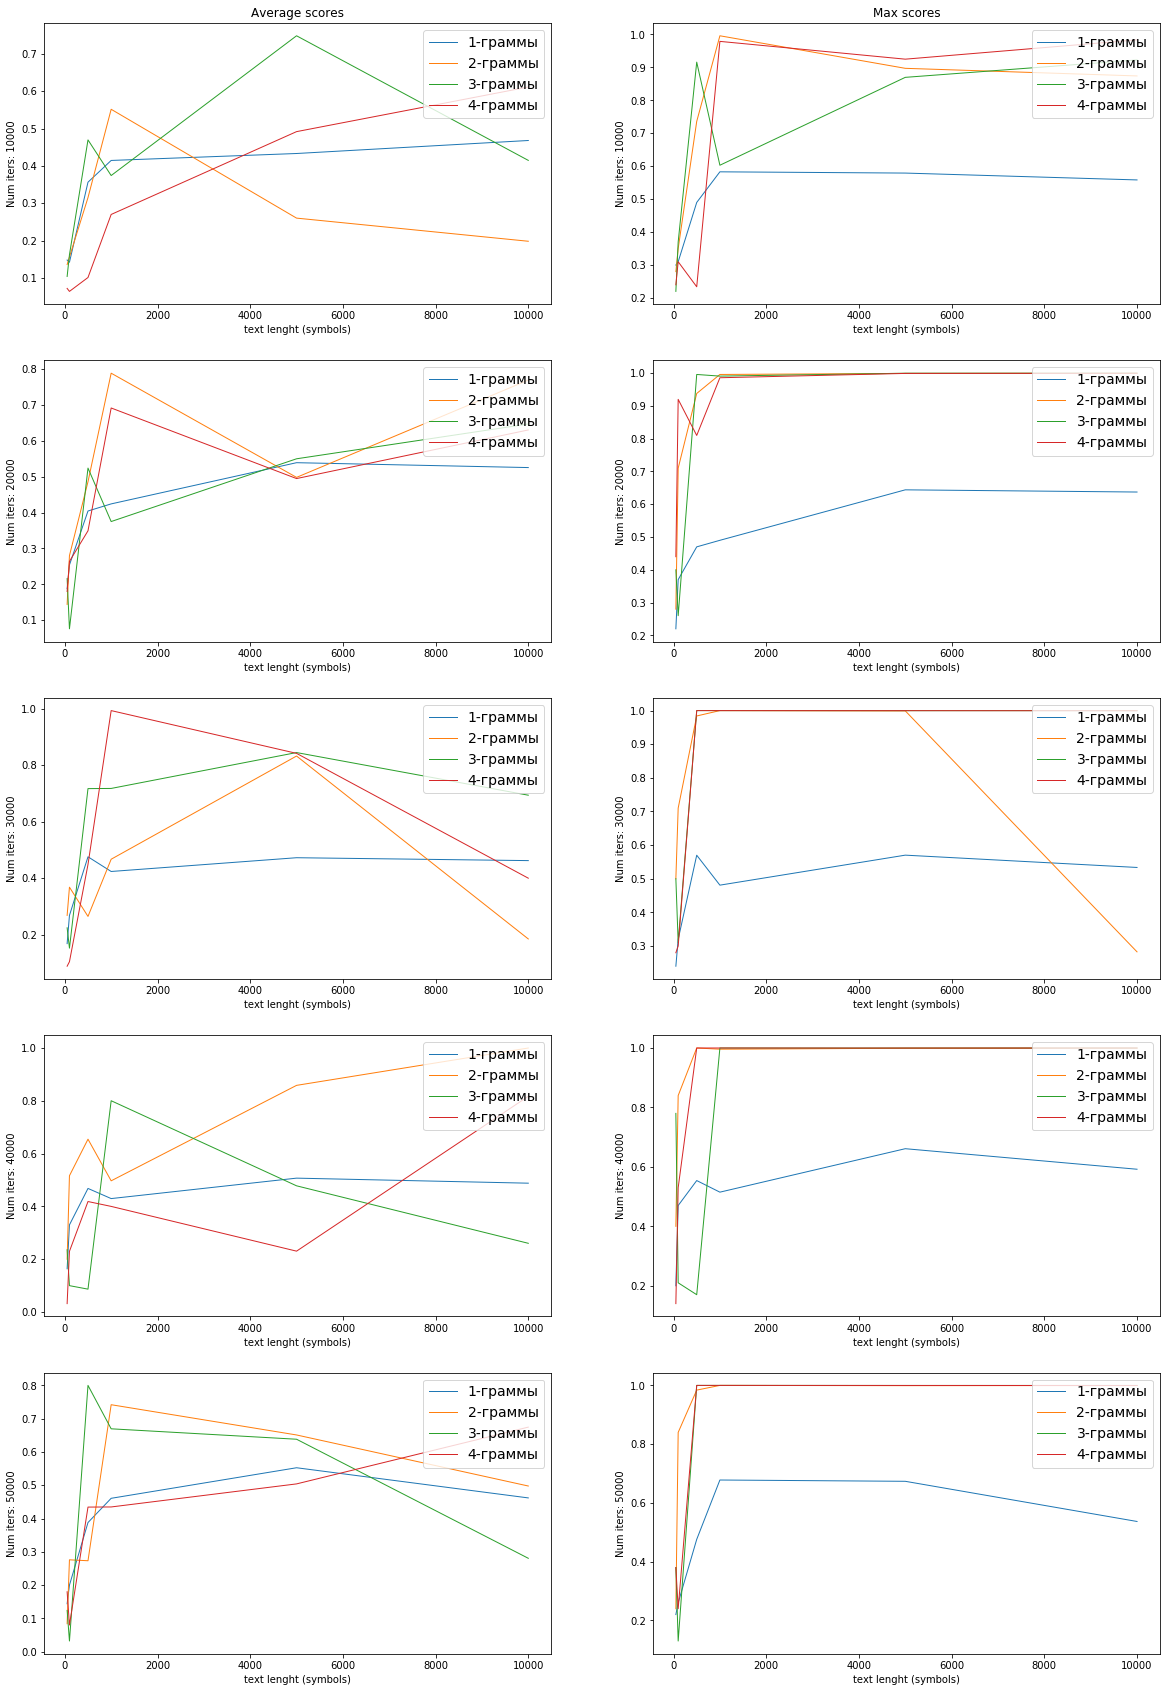

In [183]:
create_plots(n_iters_list, n_grams_list, text_lenghts, average_scores, max_scores)

#### Выводы 
- при достаточном количестве итераций и запусков 2, 3, 4-граммы выучиваются примерно одинаково, если в тексте хотя бы 500 симоволов
- в целом, не очень понятно преимущество 3, 4-грамм перед биграммами. По результатам экспериментов кажется, что единственное их преимущество - они могут помочь полностью расшифровать небольшой текст (до 1000 символов), в отличие от биграмм
- лучше увеличивать количество запусков, чем количество итераций

# Задание 6

Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).

Данная модель может подойти для ситуаций, когда мы не знаем шифр, но можем адекватно измерить качество расшифровки, даже не зная, что конкретно зашифровано. Мне кажется, применения этому алгоритму могут быть следюущие (с некоторой натяжкой):

1) Распознавание речи  
Если мы берем звуковую волну, и улавливаем там какие-то фонемы (предполагая, что один и тот же человек одни и те же фонемы произносит плюс-минус одинково), мы можем не заниматься расшифровкой этих фонем "на слух", а попробовать сопоставить их последовательность с некоторой случайной последовательностью звуков/букв. Если нам повезет, мы сможем превратить этот поток в связный текст, и понять, что человек говорил.

2) Расшифровка условных обозначений букв  
Аналогично, можно было бы попытаться сделать инструмент в помощь людям с серьезными проблемами со здоровьем (например, ДЦП). Если человек не может писать буквы, но может ставить какие-то символы, он может придумать свой алфавит, который будет расшифрован этим алгоритмом. Это немного надуманная ситуация, т.к. человек может и сам показать нам расшифровку, но возможно, в каких-то случаях это будет полезно.

3) Кодировки  
Также этот алгоритм можно было бы применить для расшифровки кодировок. Например, если есть какие-то старые редкоиспользуемые кодировки, или тексты, закодированные с ошибками, их можно было бы расшифровать с помощью этого алгоритма.

4) Расшифровки текстов на мертвых языках  
Если у нас есть древние тексты на мертвых языках, мы можем попробовать сопоставить их с современным алфавитом той же языковой группы, надеясь, что слова (по крайней мере, корни слов) будут похожи.